In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%run auxiliar.ipynb

In [2]:
erbs = pd.read_csv('database/Dados_BTS.csv')
erbs

,name,lat,lon,band,bcch,eirp,bts
0,136_2,-8.068361,-34.892722,GSM1800,662,55.59,BTS-1
1,137_3,-8.075917,-34.894611,GSM1800,806,55.59,BTS-2
2,197_1,-8.076361,-34.908000,GSM1800,666,55.59,BTS-3
3,137_1,-8.075917,-34.894611,GSM1800,690,55.59,BTS-4
4,138_2,-8.066000,-34.889444,GSM1800,673,55.59,BTS-5
5,245_2,-8.064583,-34.894583,GSM1800,682,55.59,BTS-6


In [3]:
db = pd.read_csv('database/LocTeste.csv')
db.head()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,1750.0,-8.069192,-34.888119,120.356667,134.156667,132.190000,125.356667,105.090000,131.490000,0.0,1.0,4.0,1.0,0.0,1.0
1,1339.0,-8.070419,-34.893299,98.690000,120.723333,121.890000,105.656667,104.990000,108.990000,0.0,1.0,3.0,1.0,1.0,1.0
2,2831.0,-8.062543,-34.901402,129.790000,126.323333,132.323333,116.523333,123.823333,126.490000,2.0,3.0,3.0,3.0,2.0,1.0
3,1060.0,-8.071958,-34.900723,118.723333,108.456667,123.723333,109.156667,135.123333,125.390000,1.0,1.0,1.0,1.0,2.0,1.0
4,1162.0,-8.071129,-34.891830,103.523333,121.090000,129.323333,100.956667,100.590000,134.223333,0.0,1.0,3.0,1.0,1.0,1.0


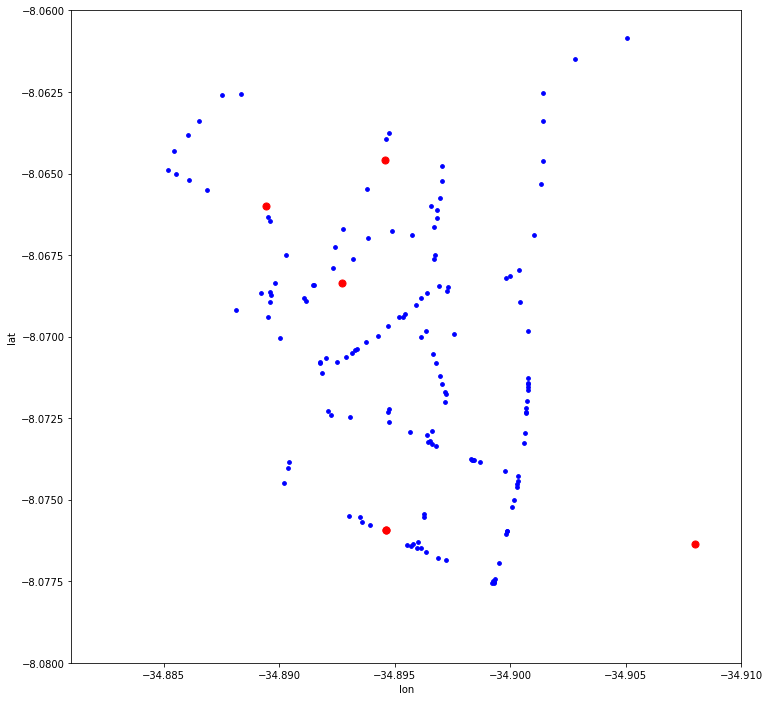

In [4]:
fig, ax = plt.subplots()
ax.scatter(db['lon'], db['lat'], s = 14, color = 'blue', alpha = 1)
ax.scatter(erbs['lon'], erbs['lat'], s = 50, color = 'red', alpha = 1)
ax.set(xlabel = 'lon', ylabel = 'lat')
plt.axis([-34.881,-34.91,-8.080,-8.060])
plt.gcf().set_size_inches((12,12))
plt.show()

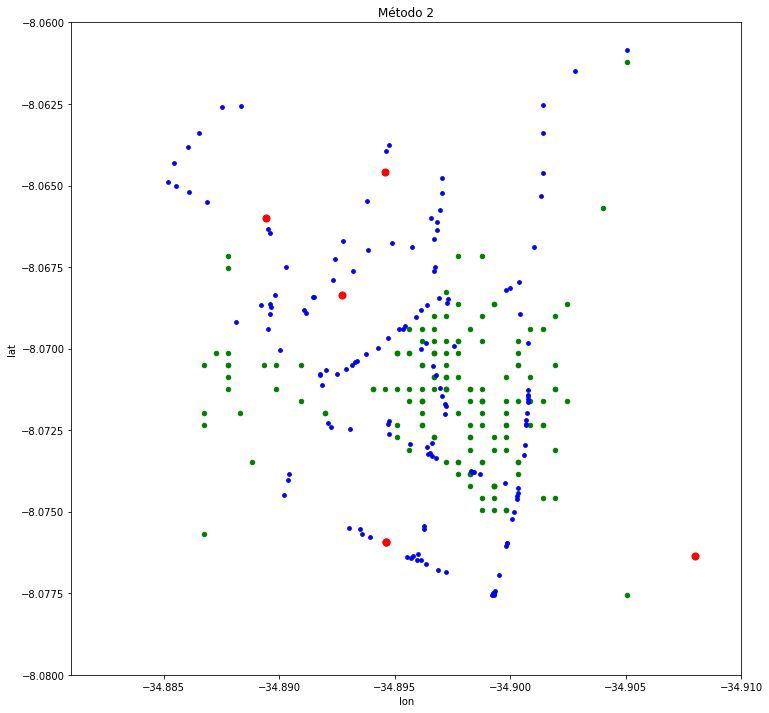

In [5]:
dbTeorico = pd.read_csv('finalResult/Resultados_Equipe4_Metodo_2.csv')
testMap = merge_on_pontoId(dbTeorico, db)
cols = ['pontoId','pathBTS1', 'pathBTS2', 'pathBTS3', 'pathBTS4', 'pathBTS5', 'pathBTS6', 'taBTS1','taBTS2','taBTS3','taBTS4','taBTS5','taBTS6']
testMap = testMap.drop(cols, axis=1)
fig, ax = plt.subplots()
ax.scatter(testMap['lon_pred'], testMap['lat_pred'], s = 20, color = 'green', alpha = 1)
ax.scatter(testMap['lon'], testMap['lat'], s = 14, color = 'blue', alpha = 1)
ax.scatter(erbs['lon'], erbs['lat'], s = 50, color = 'red', alpha = 1)
ax.set(xlabel = 'lon', ylabel = 'lat')
plt.axis([-34.881,-34.91,-8.080,-8.060])
plt.gcf().set_size_inches((12,12))
plt.title('Método 2')
plt.show()

In [6]:
errors_df = calculate_errors()
errors_df.to_csv('./finalResult/erros.csv', index=False)
round(errors_df.describe(), 2)

,0
count,150.00
mean,454.54
std,397.36
min,36.34
25%,183.00
50%,347.36
75%,571.17
max,1959.59
